### Natural Language Processing or NLP can help you sift through unstructured text data for releveant data

#### You will want to 
- compile Documents
- Featurize Them
- Compare their features

## - Basically you take some sentences and vectorize them as a "Bag of Words"

## - You can use a mathematical operation called cosine similarity on the vectors made to determine similarity 

- You can improve on Bag of Words by adjusting word counts based on their frequency in corpus (the group of all the documents)


- Use TF-IDF(Term Frequency - Inverse Document Frequency)

- Term Frequency: Importance of the term in the document
    - TF(d,t) = Number of occurences of term t in document d


- Inverse Document Frequency: Importance of the term in the corpus
    - IDF(t) = log(D/t)
        - D = total number of documents
        - t = number of documents with the term

## Mathematically, TF - IDF is expressed as

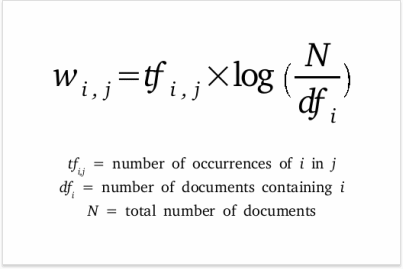

In [1]:
import nltk

In [2]:
# Now we need to download the databases from nltk using the shell

nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        C:\Users\Microsoft\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [34]:
# we want the stopwords corpus from nltk
stopwords

NameError: name 'stopwords' is not defined

In [3]:
# we are going to use a spam classification data set from UCI to create spam filter
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [4]:
print(len(messages))

5574


In [5]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [6]:
# let's print out the first 10 messages to get a better idea
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [7]:
# these messages appear to be tab seperated so we can use pandas on them
import pandas as pd

In [8]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep = '\t',names = ['label', 'message'])

In [9]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:

messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
# there appears to be a few reapeats as there are less unique messages than messages overall

In [11]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

### Now we need to start thinking about the features we will be using (feature engineering)

#### The better your knowledge of the topic the better you can engineer your features to classify correctly.

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
messages['length'] = messages['message'].apply(len)

<AxesSubplot:ylabel='Frequency'>

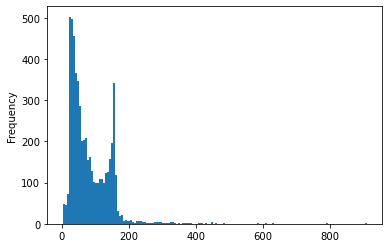

In [14]:
messages['length'].plot.hist(bins=150)

In [ ]:
# message length could be a good feature to focus on

In [15]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [16]:
messages[messages['length'] == 910] ['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

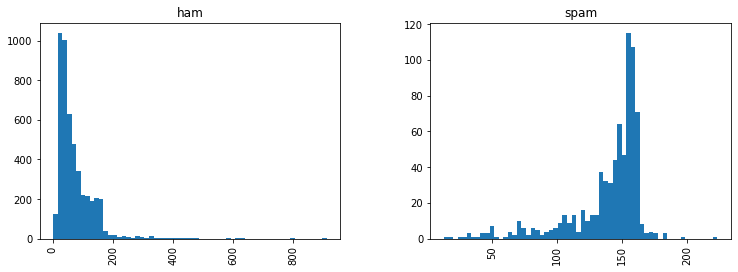

In [17]:
# we can make a subplot based on the column

messages.hist(column = 'length', by = 'label', bins=60, figsize = (12,4))

In [ ]:
# Spam messages appear longer than normal messages

In [ ]:
# we are going to try and convert the messages into vectors

In [18]:
# first import string package and then let's use list comprehension to create a function for string character separation
import string

In [19]:
mess = 'Sample message! Notice it has punctuation.'

In [25]:
nopunc = [c for c in mess if c not in string.punctuation]

In [26]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [28]:
# rejoin the words without punction
nopunc = ''.join(nopunc)

In [29]:
nopunc

'Sample message Notice it has punctuation'

In [30]:
x = ['a','b','c','d']

In [31]:
''.join(x)

'abcd'

In [35]:
from nltk.corpus import stopwords

In [32]:
# let's turn nopunc intoa list again and remove stop words (common words and contractions) with list comprehension
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [36]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [37]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [ ]:
# now let's make that function

In [39]:
def text_process(mess):
    
    """
    1. remove puncuation
    2. remove stop words
    3. return list of clean text words
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word .lower() not in stopwords.words('english')]
    
    

In [40]:
messages['message'].head().head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [ ]:
# this is pretty basic text normalization

In [ ]:
# stemming is a technique you could use to breakdown similar words to create a normalized list
# example returning the word run for run or running 

## Now lets move on to Vectorization

1. Count how many times a word appears in each message (term frequency)
2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)
3. Normalize the vectors to unit length, to abstract form the original text length (L2 norm)

### We will have to make a matrix with as many rows a as there are word and columns that represent the messages

In [41]:
# You convert your collection of documents, corpus into a matrix of token counts using CountVectorizer.
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])

In [43]:
print(len(bow_transformer.vocabulary_))

11425


In [44]:
mess4 =messages['message'][3]

In [45]:
print(mess4)

U dun say so early hor... U c already then say...


In [48]:
# Let's see a bag of words tranformation for a single sentence
bow4 = bow_transformer.transform([mess4])

In [49]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [50]:
bow_transformer.get_feature_names()[9554]

'say'

In [54]:
messages_bow = bow_transformer.transform(messages['message'])

In [55]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [ ]:
messages_bow.nnz

In [58]:
# if you have the round method applied the sparsity will be 0

sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format((sparsity)))

sparsity: 0.07940295412668218


In [63]:
# Now we will import scikit learns TFidf package 

from sklearn.feature_extraction.text import TfidfTransformer

In [65]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [67]:
# lets do the tfidf for the 4th message bag of words
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [71]:
# now let's do tfidf 

messages_tfidf = tfidf_transformer.transform(messages_bow)

## We will use the Naive Bayes Theorem to train our spam classifier

In [72]:
from sklearn.naive_bayes import MultinomialNB

In [74]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])


In [77]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [78]:
# we can check this classification prediction by checking the result of the classification from the actual value
messages['label'][3]

'ham'

In [ ]:
# what we should have done was split our model into a test and train set
# if we don't do this then we can't analyze the predictions in our data

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
# we are just going to train test split on the messages themselves without converting them into a bag of words

msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'],test_size=0.3)

In [ ]:
# sckit learn has a built in pipeline for this kind of workflow count vectorizing, weighing and normalization

In [81]:
# import the pipeline from scikit learn

from sklearn.pipeline import Pipeline

In [84]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [85]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001F7779E0B80>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [86]:
predictions = pipeline.predict(msg_test)

In [91]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [92]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1457
        spam       1.00      0.71      0.83       215

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672

